# ESG Risk Analysis on S&P 500 Companies

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.express import bar
sns.set(style="whitegrid")

In [3]:
# Load the dataset
esg = pd.read_csv(r"C:\Users\vaibhav gupta\Downloads\SP 500 ESG Risk Ratings.csv")

In [4]:
# Explore the dataset
esg.info()
esg.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  503 non-null    object 
 1   Name                    503 non-null    object 
 2   Address                 502 non-null    object 
 3   Sector                  502 non-null    object 
 4   Industry                502 non-null    object 
 5   Full Time Employees     498 non-null    object 
 6   Description             502 non-null    object 
 7   Total ESG Risk score    430 non-null    float64
 8   Environment Risk Score  430 non-null    float64
 9   Governance Risk Score   430 non-null    float64
 10  Social Risk Score       430 non-null    float64
 11  Controversy Level       430 non-null    object 
 12  Controversy Score       403 non-null    float64
 13  ESG Risk Percentile     430 non-null    object 
 14  ESG Risk Level          430 non-null    ob

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,ENPH,"Enphase Energy, Inc.","47281 Bayside Parkway\nFremont, CA 94538\nUnit...",Technology,Solar,"3,157","Enphase Energy, Inc., together with its subsid...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EMN,Eastman Chemical Company,"200 South Wilcox Drive\nKingsport, TN 37662\nU...",Basic Materials,Specialty Chemicals,"14,000",Eastman Chemical Company operates as a special...,25.3,12.8,6.6,5.8,Moderate Controversy Level,2.0,50th percentile,Medium
2,DPZ,Domino's Pizza Inc.,"30 Frank Lloyd Wright Drive\nAnn Arbor, MI 481...",Consumer Cyclical,Restaurants,"6,500","Domino's Pizza, Inc., through its subsidiaries...",29.2,10.6,6.3,12.2,Moderate Controversy Level,2.0,66th percentile,Medium
3,DAY,"Dayforce, Inc.","3311 East Old Shakopee Road\nMinneapolis, MN 5...",Technology,Software - Application,"9,084","Dayforce Inc., together with its subsidiaries,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DVA,Davita Inc.,"2000 16th Street\nDenver, CO 80202\nUnited States",Healthcare,Medical Care Facilities,"70,000",DaVita Inc. provides kidney dialysis services ...,22.6,0.1,8.4,14.1,Moderate Controversy Level,2.0,38th percentile,Medium


In [6]:
# Clean data: Convert numbers stored as strings
esg['Full Time Employees'] = esg['Full Time Employees'].str.replace(',', '')
esg['Full Time Employees'] = pd.to_numeric(esg['Full Time Employees'], errors='coerce')

Environmental Risk Category Distribution (%):
Environmental Risk Level
Low       68.389662
Medium    17.097416
High      14.512922
Name: count, dtype: float64


C:\Users\vaibhav gupta\AppData\Local\Temp\ipykernel_18880\1777987643.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_percent.index, y=risk_percent.values, palette='Set2')


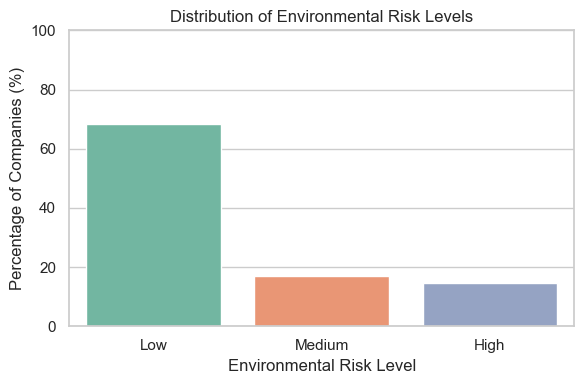

In [30]:
# Create risk categories
def categorize_risk(score):
    if score < 10:
        return 'Low'
    elif 10 <= score < 30:
        return 'Medium'
    else:
        return 'High'

esg['Environmental Risk Level'] = esg['Environment Risk Score'].apply(categorize_risk)

# Count number of companies in each category
risk_counts = esg['Environmental Risk Level'].value_counts()
risk_percent = (risk_counts / len(esg)) * 100

# Print the distribution
print("Environmental Risk Category Distribution (%):")
print(risk_percent)

# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x=risk_percent.index, y=risk_percent.values, palette='Set2')
plt.title('Distribution of Environmental Risk Levels')
plt.ylabel('Percentage of Companies (%)')
plt.xlabel('Environmental Risk Level')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [9]:
# Average ESG risk score by sector
sector_risk = esg.dropna(subset=['Total ESG Risk score']).groupby('Sector', as_index=False)['Total ESG Risk score'].mean()
sector_risk.columns = ['Sector', 'avg_risk']
sector_risk = sector_risk.sort_values(by='avg_risk', ascending=False)

C:\Users\vaibhav gupta\AppData\Local\Temp\ipykernel_18880\3037593429.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=sector_risk, x='Sector', y='avg_risk', palette='coolwarm')


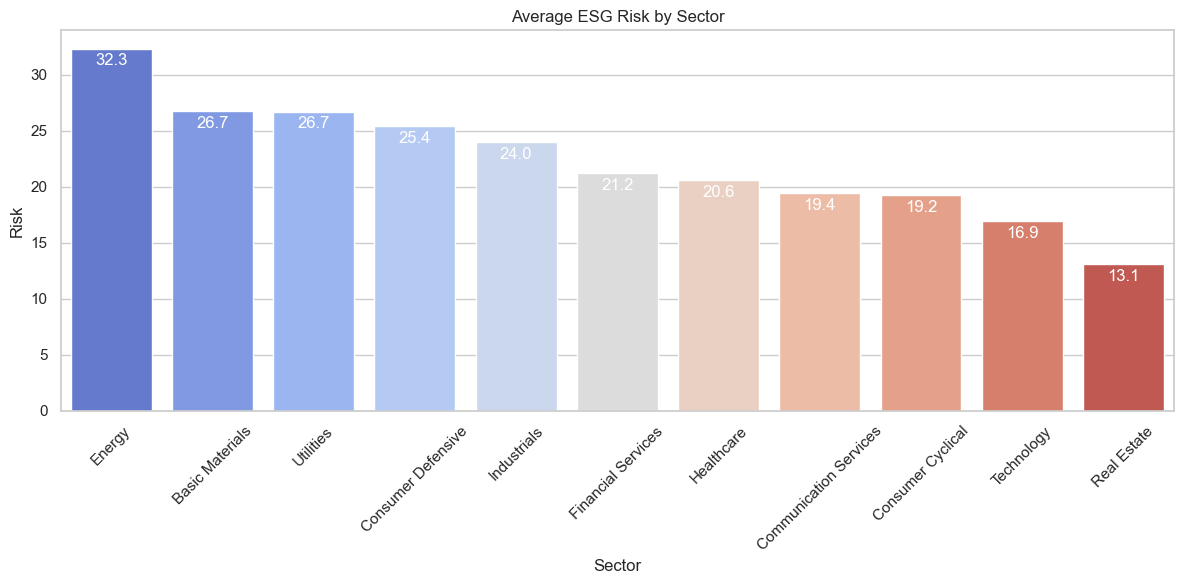

In [10]:
# Bar plot: Average ESG Risk by Sector
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=sector_risk, x='Sector', y='avg_risk', palette='coolwarm')
bar_plot.set_title("Average ESG Risk by Sector")
bar_plot.set_ylabel("Risk")
bar_plot.set_xlabel("Sector")
plt.xticks(rotation=45)
for i, v in enumerate(sector_risk['avg_risk']):
    bar_plot.text(i, v - 1.5, f"{v:.1f}", color='white', ha='center')
plt.tight_layout()
plt.show()


There is one noticeable similarity among the top three sectors. These are sectors that heavily depend on raw goods or materials. At the other end of the spectrum, real estate is a sector that does not immediately rely on raw goods, as renting or buying real estate is a substitue for building.

(companies that depend heavily on raw materials often have higher risk scores, especially from an ESG and financial volatility perspective — but it's just one part of the risk equation.)

Now let's find the average combined risk across all sectors and see how many companies within each sector fall under or above that average.

In [12]:
# Overall average ESG Risk Score
avg_total_risk = esg['Total ESG Risk score'].mean()
print(f"Average Total ESG Risk score for all sectors: {avg_total_risk:.1f}")

Average Total ESG Risk score for all sectors: 21.5


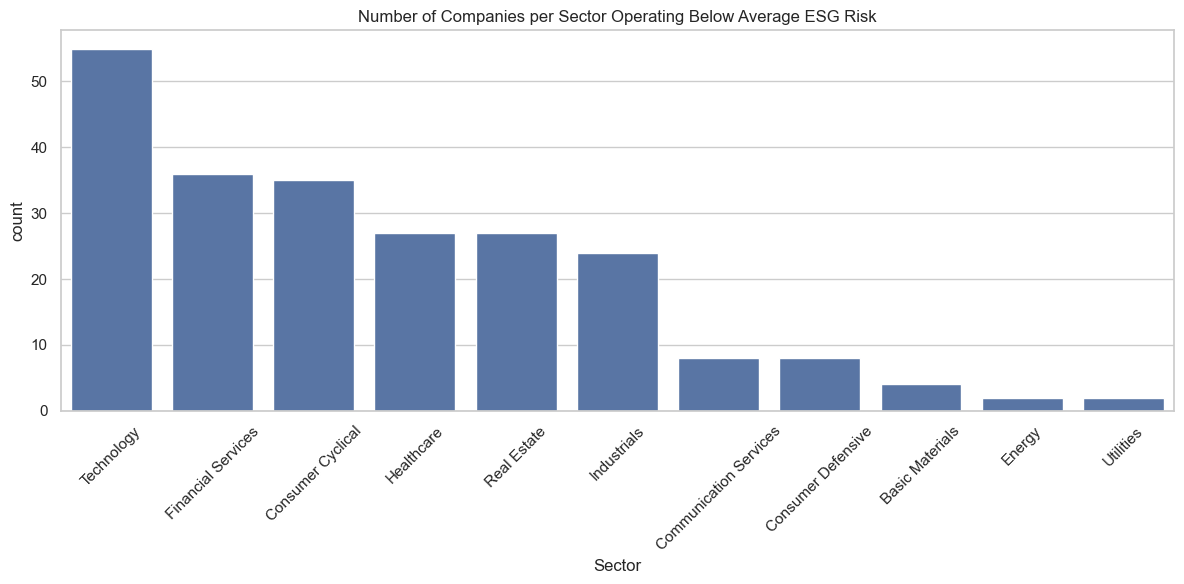

In [13]:
# Companies operating below average ESG risk
less_risk = esg[esg['Total ESG Risk score'] < avg_total_risk]
plt.figure(figsize=(12, 6))
sns.countplot(data=less_risk, x='Sector', order=less_risk['Sector'].value_counts().index)
plt.title("Number of Companies per Sector Operating Below Average ESG Risk")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As expected, there are many low risk real estate companies, as well as technology, finance, and consumer cyclical. Notice how there is only two Energy company operating below average risk. Let's explore this further by finding out which company and potentially why they have a low risk score.

In [17]:
# Energy company below average risk
energy_low = esg[(esg['Sector'] == 'Energy') & (esg['Total ESG Risk score'] < avg_total_risk)]
print(energy_low[['Name', 'Sector', 'Total ESG Risk score','Environment Risk Score', 'Social Risk Score', 'Governance Risk Score']])

# Compare with average Environment Risk for Energy
energy_avg_env = esg[(esg['Sector'] == 'Energy')]['Environment Risk Score'].mean()
print(f"Average environmental risk score for Energy sector: {energy_avg_env:.1f}")

                     Name  Sector  Total ESG Risk score  \
108  Schlumberger Limited  Energy                  20.3   
237   Kinder Morgan, Inc.  Energy                  19.0   

     Environment Risk Score  Social Risk Score  Governance Risk Score  
108                     8.1                6.3                    5.9  
237                     8.3                7.2                    3.5  
Average environmental risk score for Energy sector: 16.9


Kinder Morgan Inc (KMI) has a total ESG risk score of 19, nearly 2.5 points below the average risk score and more than 11 points below the average risk for energy companies. KMI has an environmental risk score of 8.3, let's see how that compares to other energy companies.

In [21]:
# Filter for Energy sector and calculate mean Environment Risk Score
energy_environment_risk = (
    esg
    .dropna(subset=['Total ESG Risk score', 'Sector', 'Environment Risk Score'])
    .loc[esg['Sector'] == 'Energy', 'Environment Risk Score']
    .mean()
)

print(f"Average Environment Risk Score for Energy sector: {energy_environment_risk:.1f}")



Average Environment Risk Score for Energy sector: 16.9


KMI is nearly 8 points below the average environmental risk score of 16.9 for energy companies. Let's do some research on KMI and see what we find.

https://www.bloomberg.com/news/articles/2021-04-21/kinder-morgan-posts-blowout-earnings-on-gains-from-texas-freeze

🌪 What happened during the 2021 Texas power crisis?
Here's the key takeaway from the Bloomberg article:

1) Texas had a massive power crisis due to a winter storm in 2021.
2) Many energy suppliers failed due to blackouts and system freezes.
3) But Kinder Morgan stayed operational — they:
    i)  Reduced their own power usage to save $116 million.
    ii)  Sold natural gas at high prices when demand surged → made $880 million.
   iii)   Net profit during this crisis = ~$1 billion.
✅ Instead of being vulnerable, like others, they profited and strengthened their market position.

Now let's find the makeup of companies operating above total average risk.

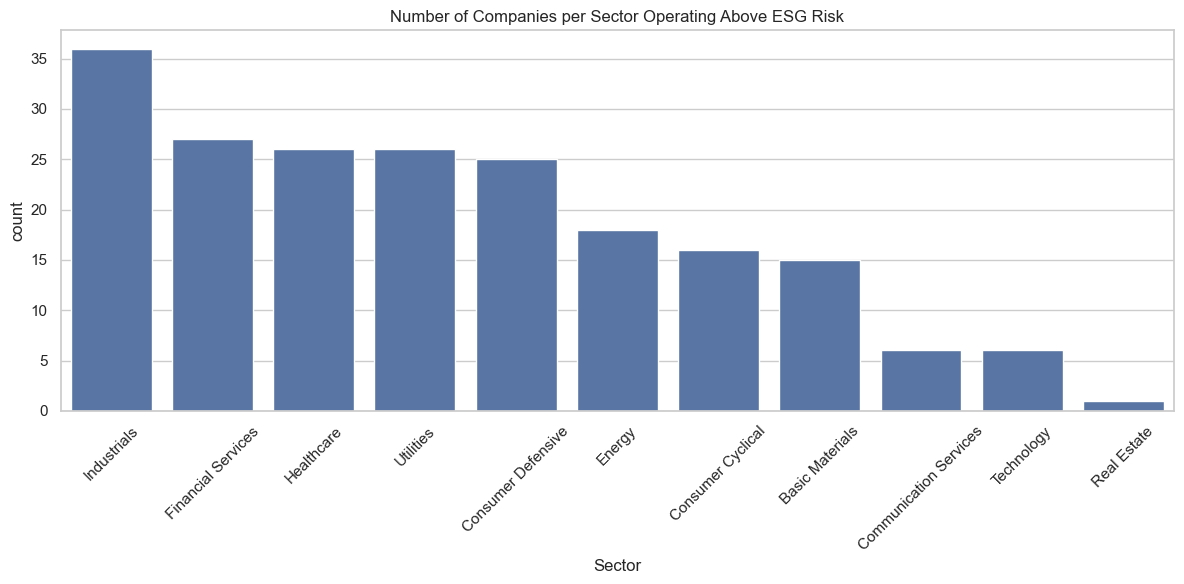

In [18]:
# Companies operating above average ESG risk
more_risk = esg[esg['Total ESG Risk score'] > avg_total_risk]
plt.figure(figsize=(12, 6))
sns.countplot(data=more_risk, x='Sector', order=more_risk['Sector'].value_counts().index)
plt.title("Number of Companies per Sector Operating Above ESG Risk")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Notice there is only one Real Estate company operating above average risk. Let's find out which one.

In [22]:
# Real Estate company above average ESG risk
real_estate_high = esg[(esg['Sector'] == 'Real Estate') & (esg['Total ESG Risk score'] > avg_total_risk)]
print(real_estate_high[['Name', 'Sector', 'Total ESG Risk score', 
                        'Environment Risk Score', 'Social Risk Score', 'Governance Risk Score']])

real_estate_avg_social = esg[esg['Sector'] == 'Real Estate']['Social Risk Score'].mean()
print(f"Average social risk score for Real Estate sector: {real_estate_avg_social:.2f}")

                 Name       Sector  Total ESG Risk score  \
374  Costar Group Inc  Real Estate                  21.9   

     Environment Risk Score  Social Risk Score  Governance Risk Score  
374                     4.9                9.3                    7.7  
Average social risk score for Real Estate sector: 3.64


The company is CoStar Group Inc. and they have a noticeably high social risk score of 9.3. Let's find the average social risk score of the real estate sector.

In [24]:
# Filter for Real Estate sector and calculate mean Social Risk Score
real_estate_social_risk = (
    esg
    .dropna(subset=['Total ESG Risk score', 'Sector', 'Social Risk Score'])
    .loc[esg['Sector'] == 'Real Estate', 'Social Risk Score']
    .mean()
)

print(f"Average Social Risk Score for Real Estate sector: {real_estate_social_risk:.2f}")


Average Social Risk Score for Real Estate sector: 3.64


The average social risk in real estate is 3.64, so CoStar is almost 6 points over the average. Let's do some research and see if this can be explained.

https://www.forbes.com/sites/tomspiggle/2022/03/07/why-costars-alleged-employee-monitoring-program-could-backfire/?sh=26a9e22b19d3

Why?
 1) During the COVID-19 pandemic, CoStar monitored employees working from home — including scheduled surveillance checks.
 2) This affected employee privacy, a key part of the "Social" pillar in ESG (Environmental, Social, Governance).
 3) Result? 37% of staff left in 2021 — a major workforce retention issue.
 4) In response, CoStar’s 2023 ESG report claimed improvements: protocols for privacy and safety, etc.
✅ This example shows how specific events (like employee surveillance) can raise a company’s social risk score, and how ESG scores reflect real company practices — both problems and improvements.


We have examined two scenarios that illustrate the considerations made when grading a corporation's ESG score. This is useful for analysts and executives seeking to mitigate high risks. Let's shift to the perspective of an investor, who might simply want to use this data as a guide to safe investing.

Here's the scenario: An investor looks at the graph above depicting companies operating below average market risk. They see that the technology sector has the most companies below average risk, therefore making it a more conservative choice. So the investing team makes the decision to invest in tech, but they want to know which specific companies to consider. Let's find out.

Filter for technology companies below average total ESG risk score.

Number of Technology companies below average risk: 55


C:\Users\vaibhav gupta\AppData\Local\Temp\ipykernel_18880\2485305168.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tech_safe.sort_values(by='Total ESG Risk score', ascending=False),


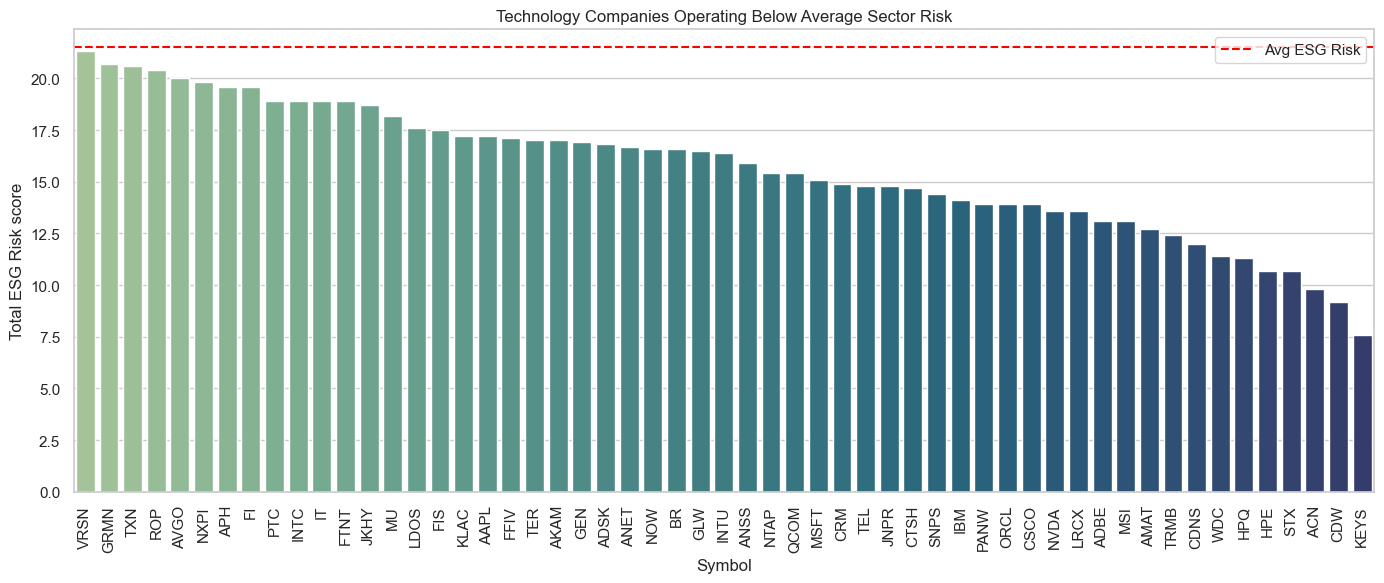

In [23]:
# Investor Perspective: Low-risk Tech companies
tech_safe = esg[(esg['Sector'] == 'Technology') & (esg['Total ESG Risk score'] < avg_total_risk)]
print(f"Number of Technology companies below average risk: {len(tech_safe)}")

plt.figure(figsize=(14, 6))
sns.barplot(data=tech_safe.sort_values(by='Total ESG Risk score', ascending=False), 
            x='Symbol', y='Total ESG Risk score', palette='crest')
plt.axhline(y=avg_total_risk, color='red', linestyle='--', label='Avg ESG Risk')
plt.title("Technology Companies Operating Below Average Sector Risk")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()